# K Nearest Neighbors


## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data
** Read the titanic csv file into a dataframe **

In [20]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
df = pd.read_csv(url, names=names)

**Check the head of the dataframe.**

In [21]:
df.head(3)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [25]:
x = 'sepal-width'
y = 'Class'

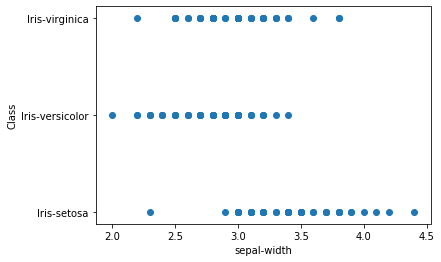

In [26]:
plt.scatter(df[x], df[y])
plt.xlabel(x)
plt.ylabel(y)
plt.show()

### Task: Create a histogram of feature 'sepal-width'

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

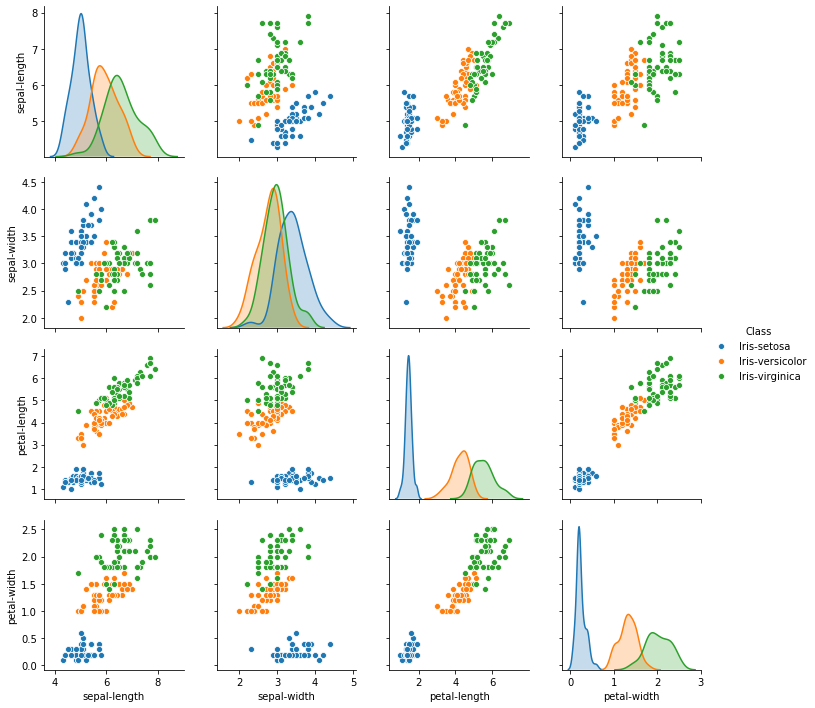

In [4]:
sns.pairplot(df, hue='Class')

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df_feature = df.drop('Class', axis=1)

In [7]:
X = df_feature
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Using KNN

In [27]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://ljdursi.github.io/ML-for-scientists/outputs/classification/knn-variance.png")

**Import KNeighborsClassifier from scikit learn.**

In [8]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [9]:
knn = KNeighborsClassifier(n_neighbors = 2)

**Fit this KNN model to the training data.**

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [11]:
pred = knn.predict(X_test)

## Create a confusion matrix and classification report

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [13]:
print(accuracy_score(y_test, pred))

0.9333333333333333


In [14]:
print(confusion_matrix(y_test, pred))

[[10  0  0]
 [ 0 12  0]
 [ 0  2  6]]


In [15]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.86      1.00      0.92        12
 Iris-virginica       1.00      0.75      0.86         8

       accuracy                           0.93        30
      macro avg       0.95      0.92      0.93        30
   weighted avg       0.94      0.93      0.93        30



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [16]:
import numpy as np
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now create the following plot using the information from your for loop.**

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

Text(0, 0.5, 'Error Rate')

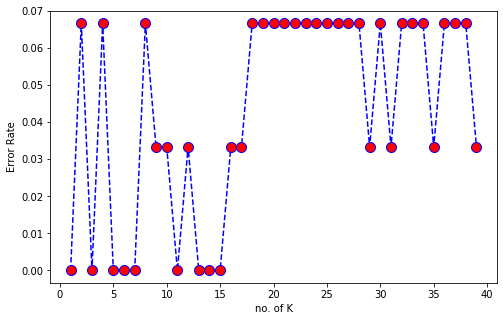

In [17]:
plt.figure(figsize=(8,5))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of K')
plt.ylabel('Error Rate')

In [18]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# End.